
# Thermocouple reader

This notebook is the Python interface to the Arduino code for the Thermocouple reader.

Import packages:

In [1]:
import pyvisa
import time
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from IPython import display

Connect to the Arduino:

In [2]:
rm = pyvisa.ResourceManager()
rm.list_resources()

('ASRL1::INSTR',)

In [4]:
a = rm.open_resource('ASRL24::INSTR')
a.baud_rate = 115200
a.read_termination = "\n"

### Reading from sensors

Test connection:

In [27]:
for i in range(1,21):
    print(i, a.query("t"+str(i)))

1 21.44
2 15385.00
3 15385.00
4 15385.00
5 15385.00
6 15385.00
7 15385.00
8 23.54
9 15385.00
10 15385.00
11 15385.00
12 15385.00
13 15385.00
14 15385.00
15 15385.00
16 15385.00
17 15385.00
18 15385.00
19 15385.00
20 15385.00


KeyboardInterrupt: 

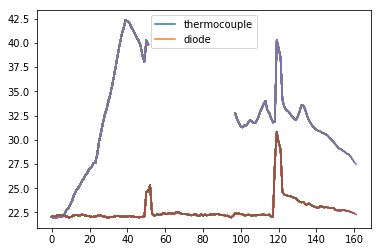

In [5]:
T1_vals, T8_vals = [], []
plt.plot(T1_vals, label="thermocouple")
plt.plot(T8_vals, label="diode")
plt.legend()
for i in range(500):
    # get data
    T1 = float(a.query("t1"))
    T1 = T1 if T1<500 else np.nan
    T8 = float(a.query("t8"))
    T8 = T8 if T8<500 else np.nan
    
    T1_vals.append(T1)
    T8_vals.append(T8)
    plt.plot(T1_vals, label="thermocouple")
    plt.plot(T8_vals, label="diode")
    display.display(plt.gcf())
    display.clear_output(wait=True)

### Cleanup

In [ ]:
# close the connection to the Arduino:
a.close()